___

# HOUSE PRICE NOTEBOOK

______

STEP :
1. EDA
2. Preprocessing
3. FE
4. Preparation
5. Modeling
6. Finalization

In [1]:
import pandas as pd
import numpy as np
import math

# Input function : df

In [2]:
# data train
df_train = pd.read_csv('train.csv')
# data for submission
df_test = pd.read_csv('test.csv')

df_test['SalePrice']=-10000
df_full = df_train.append(df_test)

well, labeled data has 1460 observation and 81 columns including target variable while unlabeled data has 1459 observation and 80 columns

___________

# EDA

________________

i want to know some condition of the data. i want to know about MISSING VALUES, DATA TYPES, LIST OF VARIABLES. I also want to know about the unlabelled data since it needed to be predicted. 

# Function : Understanding Data

In [3]:
def understand(df):
    print("Dimesi Data : \n",df.shape,"\n")
     
    df_summary = pd.DataFrame((df.isnull().sum()/df.shape[0])*100,columns=['missing'])
    df_summary.sort_values(by='missing',ascending=False,inplace=True)
    df_summary['missing num']=df.isnull().sum()
    df_summary['data types']=df.dtypes
    
    return df_summary[df_summary['missing']>0]

In [4]:
understand(df_full)

Dimesi Data : 
 (2919, 81) 



,missing,missing num,data types
PoolQC,99.657417,2909,object
MiscFeature,96.402878,2814,object
Alley,93.216855,2721,object
Fence,80.438506,2348,object
FireplaceQu,48.646797,1420,object
LotFrontage,16.649538,486,float64
GarageFinish,5.447071,159,object
GarageQual,5.447071,159,object
GarageCond,5.447071,159,object
GarageYrBlt,5.447071,159,float64


In [5]:
df_summary = understand(df_full)

Dimesi Data : 
 (2919, 81) 



In this eksploration i found that some variables have missing value (both in labelled data and unlabelled data). i also found the fact that there are three variables that most of them missing and the numbers is almost 100%. Then, there are also some variables that have some number of missing value.  

# Treatment for Missing Data

i will do some quick treatment for missing value that has number of missing almost 100 %. I Think that those variable will not give any benefit in modeling. This will make us drop three variables.

## 1. Eksploration For Missing Data

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
cols = ['PoolQC','MiscFeature','Alley','SalePrice']
df_train[cols].head(20)

,PoolQC,MiscFeature,Alley,SalePrice
0,NaN,NaN,NaN,208500
1,NaN,NaN,NaN,181500
2,NaN,NaN,NaN,223500
3,NaN,NaN,NaN,140000
4,NaN,NaN,NaN,250000
5,NaN,Shed,NaN,143000
6,NaN,NaN,NaN,307000
7,NaN,Shed,NaN,200000
8,NaN,NaN,NaN,129900
9,NaN,NaN,NaN,118000


### PoolQc

In [8]:
df_train['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [9]:
df_train['PoolQC'].fillna('no item',inplace=True)

In [10]:
df_train[['PoolQC','SalePrice']].groupby('PoolQC').mean()

,SalePrice
PoolQC,
Ex,490000.000000
Fa,215500.000000
Gd,201990.000000
no item,180404.663455


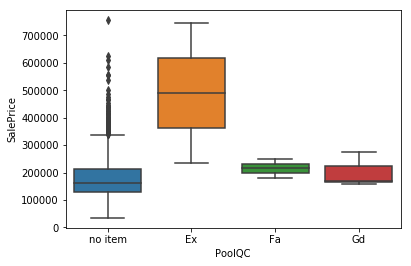

In [11]:
sns.boxplot(x='PoolQC',y='SalePrice',data=df_train)

### MiscFeature

In [12]:
df_train['MiscFeature'].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [13]:
df_full['MiscFeature'].value_counts()

Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64

In [14]:
df_train['MiscFeature'].fillna('no item',inplace=True)

In [15]:
df_train[['MiscFeature','SalePrice']].groupby('MiscFeature').mean()

,SalePrice
MiscFeature,
Gar2,170750.000000
Othr,94000.000000
Shed,151187.612245
TenC,250000.000000
no item,182046.410384


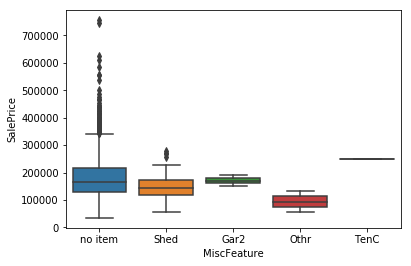

In [16]:
sns.boxplot(x='MiscFeature',y='SalePrice',data=df_train)

### Alley

In [17]:
df_train['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [18]:
df_train['Alley'].fillna('no item',inplace=True)

In [19]:
df_train[['Alley','SalePrice']].groupby('Alley').mean()

,SalePrice
Alley,
Grvl,122219.080000
Pave,168000.585366
no item,183452.131483


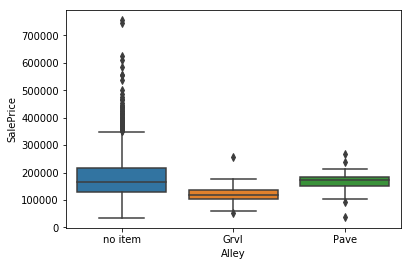

In [20]:
sns.boxplot(x='Alley',y='SalePrice',data=df_train)

## 2. Input for a few missing

In [21]:
df_summary[df_summary['data types']==object]

,missing,missing num,data types
PoolQC,99.657417,2909,object
MiscFeature,96.402878,2814,object
Alley,93.216855,2721,object
Fence,80.438506,2348,object
FireplaceQu,48.646797,1420,object
GarageFinish,5.447071,159,object
GarageQual,5.447071,159,object
GarageCond,5.447071,159,object
GarageType,5.378554,157,object
BsmtExposure,2.809181,82,object


In [22]:
var_obj = list(df_summary[(df_summary['missing num']<5)&(df_summary['data types']==object)].index)
var_obj

['MSZoning',
 'Functional',
 'Utilities',
 'SaleType',
 'Electrical',
 'Exterior2nd',
 'Exterior1st',
 'KitchenQual']

In [23]:
for var in var_obj:
    df_full[var].fillna(df_full[var].mode()[0],inplace=True)

In [ ]:
df_summary[df_summary['data types']!=object]

,missing,missing num,data types
LotFrontage,16.649538,486,float64
GarageYrBlt,5.447071,159,float64
MasVnrArea,0.787941,23,float64
BsmtHalfBath,0.068517,2,float64
BsmtFullBath,0.068517,2,float64
GarageArea,0.034258,1,float64
BsmtFinSF1,0.034258,1,float64
GarageCars,0.034258,1,float64
BsmtUnfSF,0.034258,1,float64
TotalBsmtSF,0.034258,1,float64


In [ ]:
var_num = list(df_summary[(df_summary['missing num']<5)&(df_summary['data types']=='float64')].index)
var_num

['BsmtHalfBath',
 'BsmtFullBath',
 'GarageArea',
 'BsmtFinSF1',
 'GarageCars',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFinSF2']

In [ ]:
for var in var_num:
    df_full[var].fillna(df_full[var].mean(),inplace=True)

In [ ]:
df_summary = understand(df_full)
df_summary

Dimesi Data : 
 (2919, 81) 



,missing,missing num,data types
PoolQC,99.657417,2909,object
MiscFeature,96.402878,2814,object
Alley,93.216855,2721,object
Fence,80.438506,2348,object
FireplaceQu,48.646797,1420,object
LotFrontage,16.649538,486,float64
GarageYrBlt,5.447071,159,float64
GarageFinish,5.447071,159,object
GarageQual,5.447071,159,object
GarageCond,5.447071,159,object


In [ ]:
df_summary[df_summary['data types']==object]

,missing,missing num,data types
PoolQC,99.657417,2909,object
MiscFeature,96.402878,2814,object
Alley,93.216855,2721,object
Fence,80.438506,2348,object
FireplaceQu,48.646797,1420,object
GarageFinish,5.447071,159,object
GarageQual,5.447071,159,object
GarageCond,5.447071,159,object
GarageType,5.378554,157,object
BsmtExposure,2.809181,82,object


In [ ]:
tmp_var = df_summary[df_summary['data types']==object].index

for i in tmp_var:
    df_full[i].fillna('no item',inplace=True)

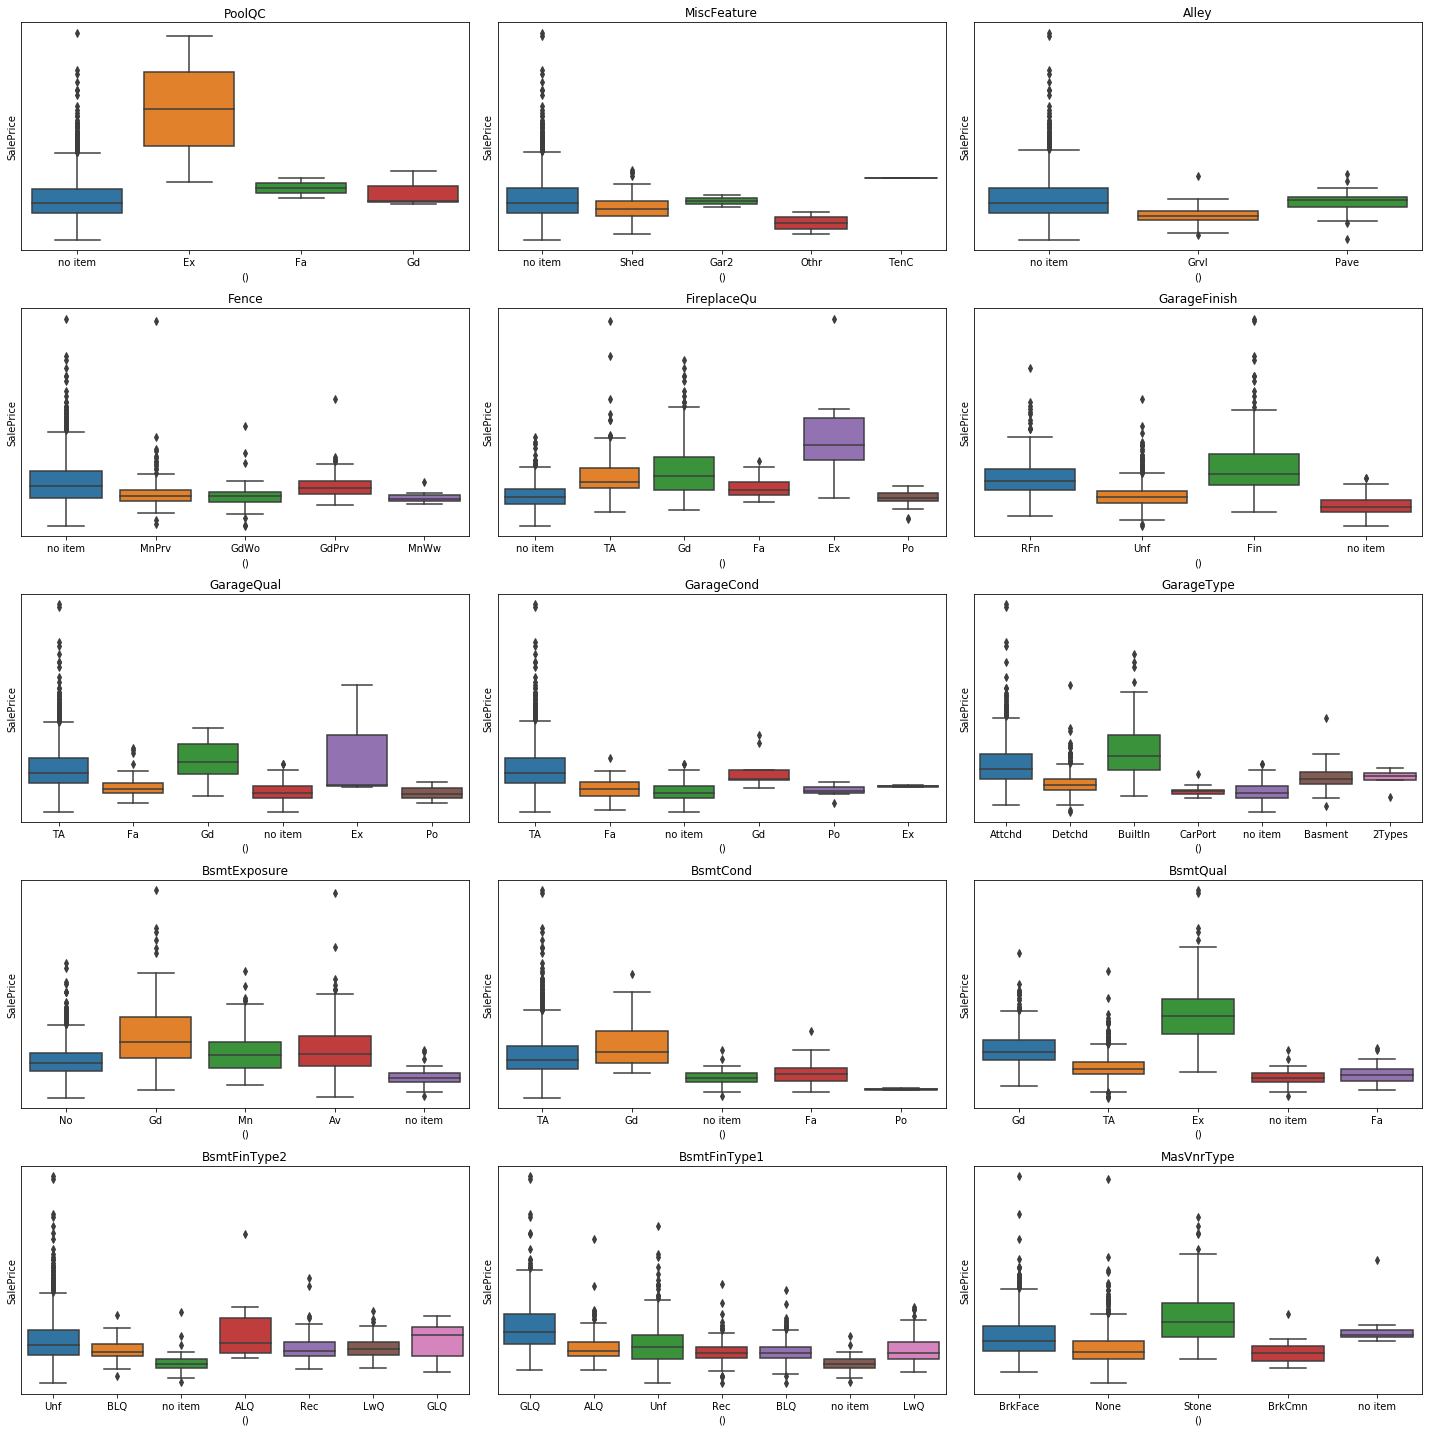

In [ ]:
tmp_var = df_summary[df_summary['data types']==object].index

fig, axes = plt.subplots(math.ceil(len(tmp_var)/3),3,figsize=(20,20))

ax = axes.ravel()

for i in range(len(tmp_var)):
    sns.boxplot(x=tmp_var[i],y='SalePrice',data=df_full[df_full['SalePrice']!=-10000],ax=ax[i])
    ax[i].set_title(tmp_var[i])
    ax[i].set_yticks(())
    ax[i].set_xlabel(())
    #ax[i].set_xticklabels(df[CATEGORIC_FITUR[i]],rotation=45)
    
plt.tight_layout()
plt.show()

In [ ]:
df_summary[df_summary['data types']!=object]

,missing,missing num,data types
LotFrontage,16.649538,486,float64
GarageYrBlt,5.447071,159,float64
MasVnrArea,0.787941,23,float64


In [ ]:
tmp_var = ['LotFrontage','MasVnrArea']

for i in tmp_var:
    df_full[i].fillna(0,inplace=True)

In [ ]:
df_full['GarageYrBlt']=np.where(df_full['GarageYrBlt'].isnull()==True,df_full.YearBuilt,df_full['GarageYrBlt'])

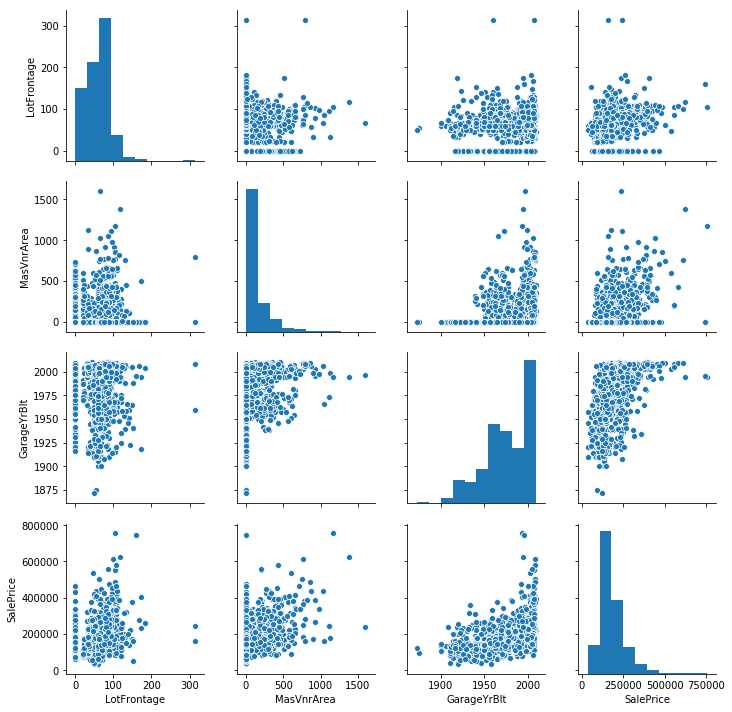

In [ ]:
tmp_var = ['LotFrontage','MasVnrArea','GarageYrBlt','SalePrice']

sns.pairplot(df_full[df_full['SalePrice']!=-10000][tmp_var],height=2.5)
plt.show()

In [ ]:
understand(df_full)

Dimesi Data : 
 (2919, 81) 



,missing,missing num,data types


# Function : separate kind of variable

i think that sperate list of varibel based on their type will be much helping in our task

response

In [ ]:
y = df_train['SalePrice']

feature

In [ ]:
def categorical(df):
    num=list(df.columns[df.dtypes=='object'])
    return num
    
def numerical(df):
    cat=list(df.columns[df.dtypes=='int64'])+list(df.columns[df.dtypes=='float64'])
    return cat

In [ ]:
df_train.drop(['SalePrice'],axis=1,inplace=True)

In [ ]:
NUMERIC_FITUR = numerical(df_full)
NUMERIC_FITUR = NUMERIC_FITUR[1:]
CATEGORIC_FITUR = categorical(df_full)
df_train['SalePrice'] = y

here i separate varible based on data type (numerical categorical) and variable type (feature and target)

_________

# EDA

________

Here, i will do some exploration for target/response variable, numerical varibel , categorical variable, and their relationship to the target variable. Hope i can find some interesting fact.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

def _revrt(X,m=None):
    """
    Inverse of forrt. Equivalent to Munro (1976) REVRT routine.
    """
    if m is None:
        m = len(X)
    i = int(m // 2+1)
    y = X[:i] + np.r_[0,X[i:],0]*1j
    return np.fft.irfft(y)*m

from statsmodels.nonparametric import kdetools

# replace the implementation with new method.
kdetools.revrt = _revrt

# import seaborn AFTER replacing the method. 
import seaborn as sns

In [ ]:
# fontscale
sns.set_context("paper", font_scale=2)

# 1. Response

In [ ]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

here are some descriptive statistics of the response variable 'SalePrice'. We can see the mean, mode, quartile, etc.

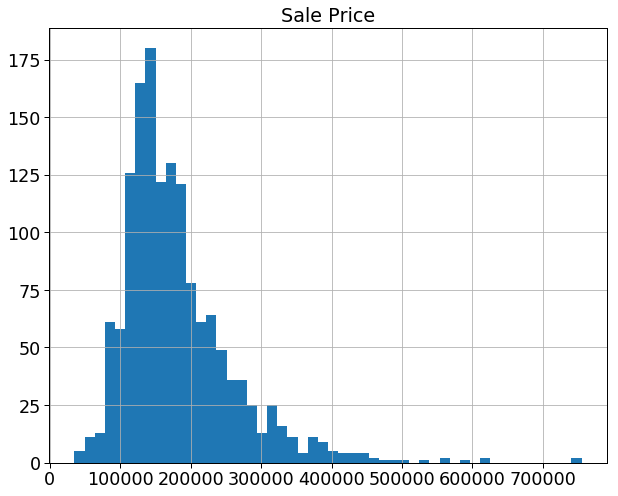

In [ ]:
# window dimensian
plt.figure(figsize=(10,8))

# histogram
y.hist(bins=50)

# title
plt.title('Sale Price')

plt.show()

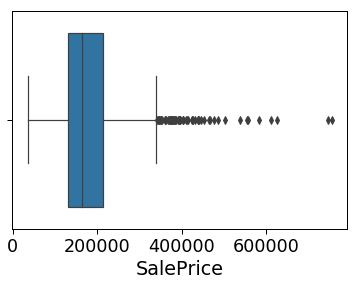

In [ ]:
sns.boxplot(y)
plt.show()

In [ ]:
print("Kurtosis",y.kurt())
print("Skewnes",y.skew())

Kurtosis 6.536281860064529
Skewnes 1.8828757597682129


from histogram and boxplot above we know that Sale Price of the houses have right skewed distribution and have some outliers. 

# 2. Numerical Feature

this will be the complete data exploration. I think this will help to inpire any idea about the feature engineering process

# Function : Multiple Histogran

In [ ]:
def multi_hist(df,NUMERIC_FITUR):
    fig, axes = plt.subplots(math.ceil(len(NUMERIC_FITUR)/3),3,figsize=(20,40))

    ax = axes.ravel()

    for i in range(len(NUMERIC_FITUR)):
        _,bins = np.histogram(df[NUMERIC_FITUR[i]].dropna(),bins=50)
        df[NUMERIC_FITUR[i]].hist(ax=ax[i],bins=50,alpha=0.5)
        ax[i].set_title(NUMERIC_FITUR[i])
        ax[i].set_yticks(())
        
    plt.tight_layout()
    plt.show()

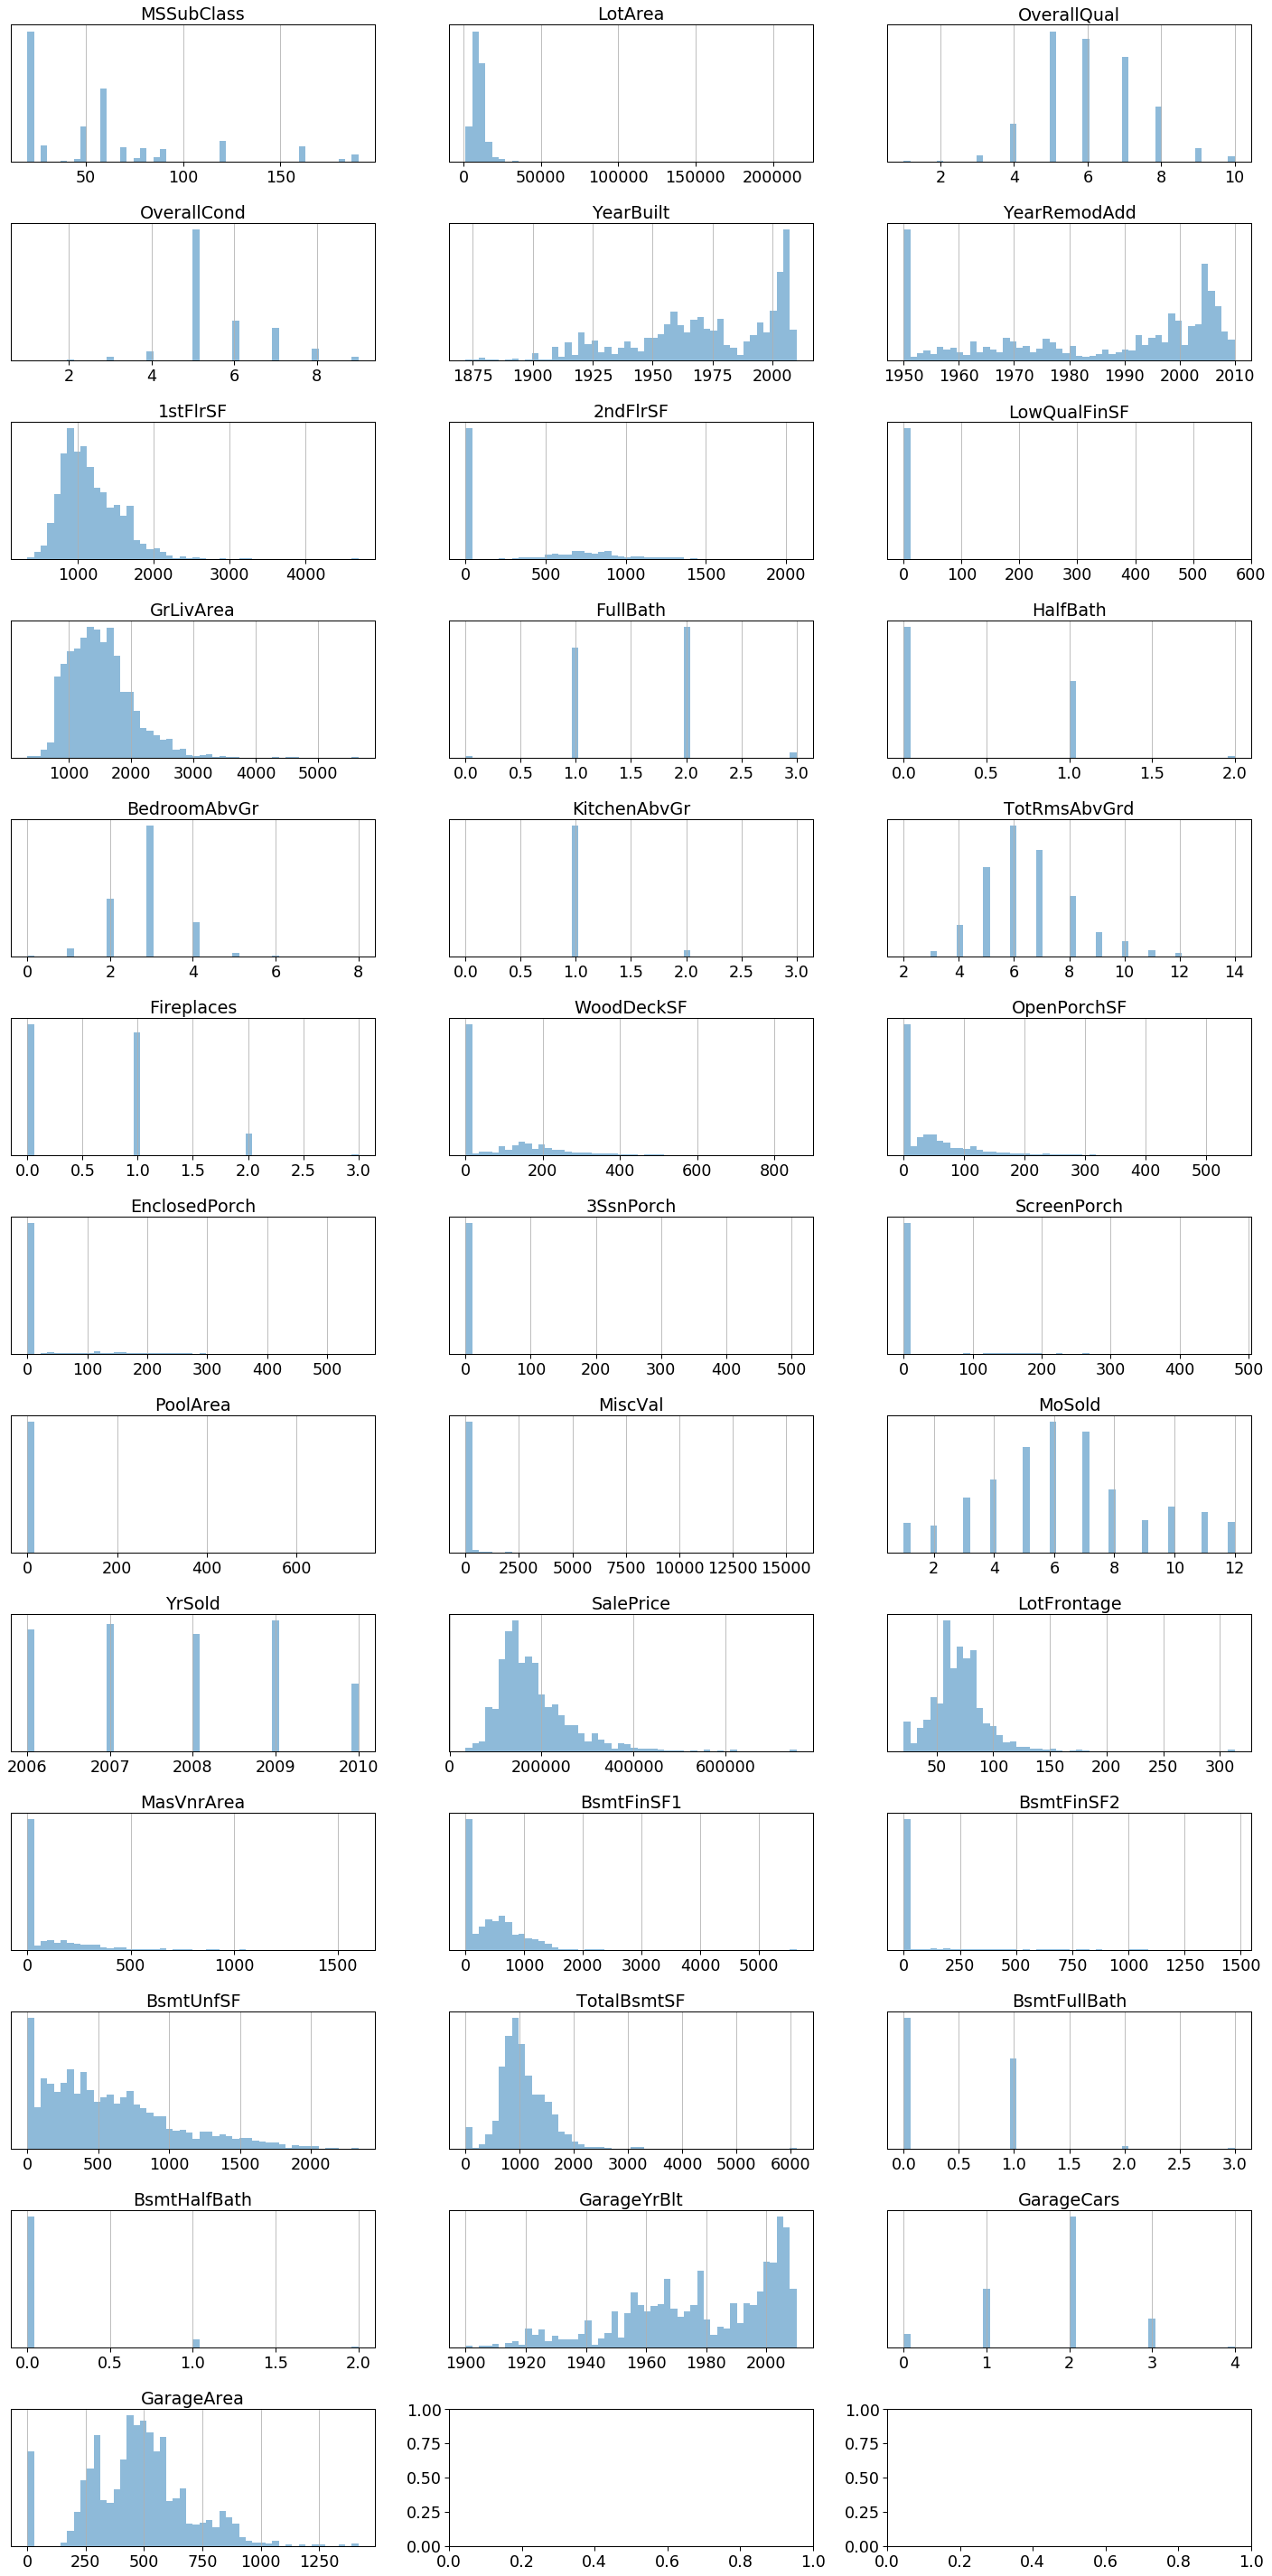

In [ ]:
multi_hist(df_train,NUMERIC_FITUR)

# Function : Multiple Boxplot

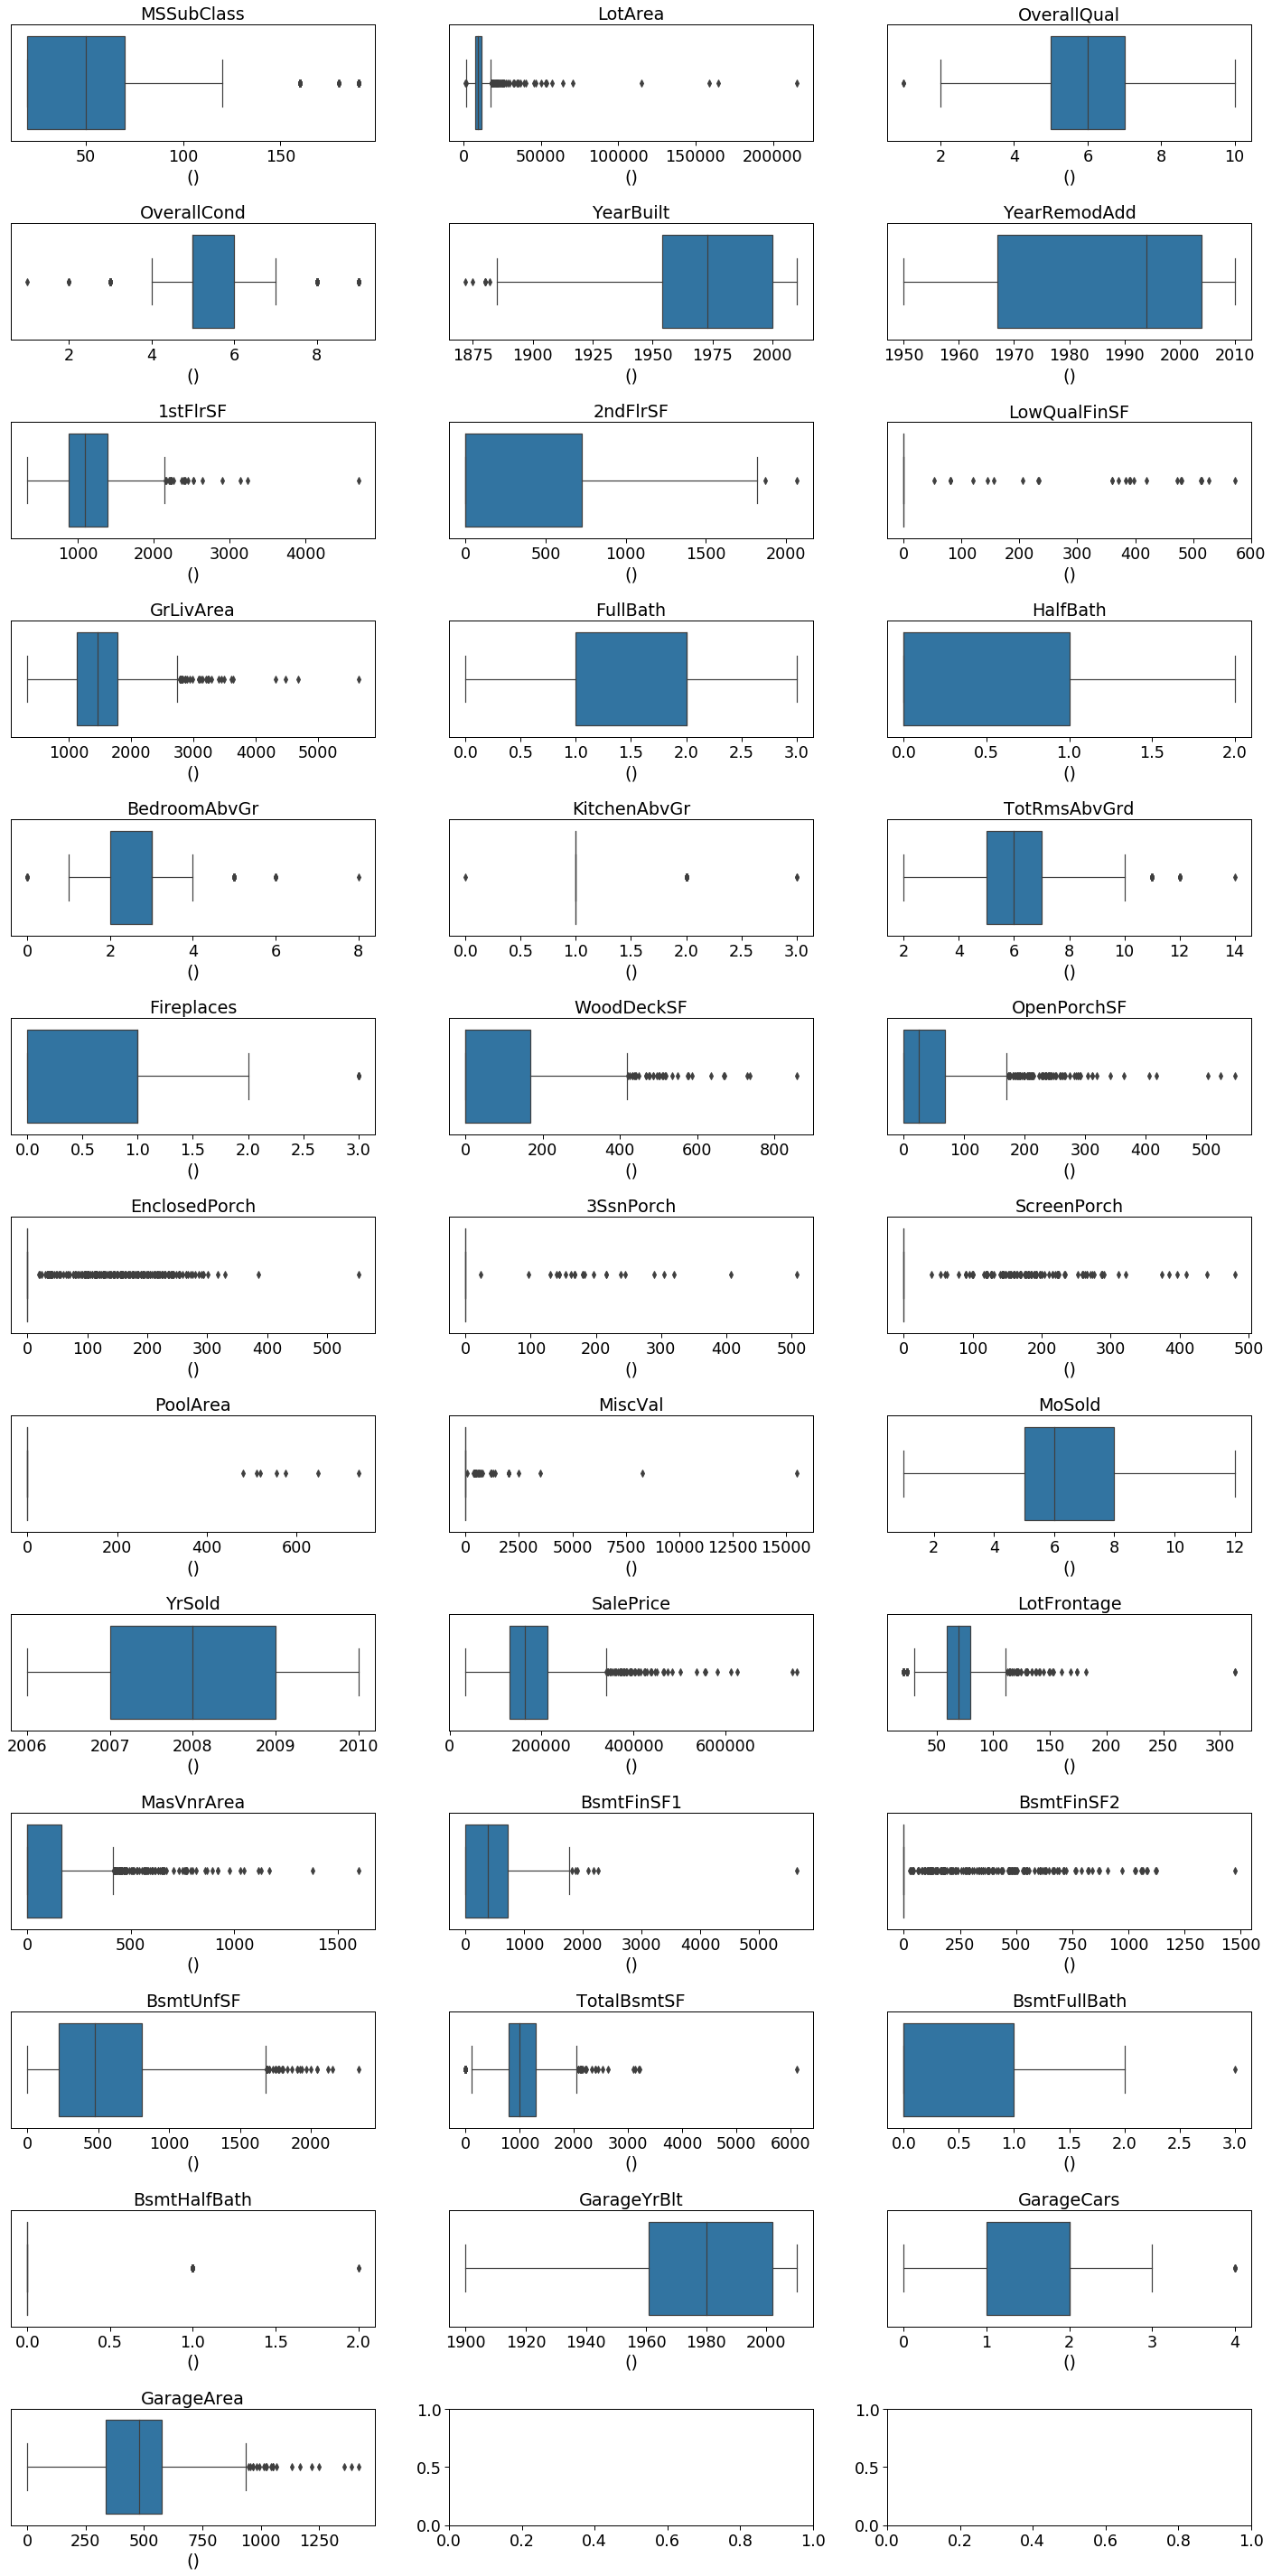

In [ ]:
fig, axes = plt.subplots(math.ceil(len(NUMERIC_FITUR)/3),3,figsize=(20,40))

ax = axes.ravel()

for i in range(len(NUMERIC_FITUR)):
    sns.boxplot(df_train[NUMERIC_FITUR[i]],ax=ax[i])
    ax[i].set_title(NUMERIC_FITUR[i])
    ax[i].set_yticks(())
    ax[i].set_xlabel(())
        
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import skew

df_skew=pd.DataFrame(df_train[NUMERIC_FITUR].skew())
df_skew.sort_values(0,ascending=False)

,0
MiscVal,24.476794
PoolArea,14.828374
LotArea,12.207688
3SsnPorch,10.304342
LowQualFinSF,9.011341
KitchenAbvGr,4.488397
BsmtFinSF2,4.255261
ScreenPorch,4.122214
BsmtHalfBath,4.103403
EnclosedPorch,3.089872


In [ ]:
mmm=list(df_skew[df_skew[0]>2].index)
df_full[mmm].describe()

,LotArea,LowQualFinSF,KitchenAbvGr,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,LotFrontage,MasVnrArea,BsmtFinSF2,BsmtHalfBath
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,10168.114080,4.694416,1.044536,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,57.766701,101.396026,49.582248,0.061364
std,7886.996359,46.396825,0.214462,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,33.481636,178.854579,169.176615,0.245603
min,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7478.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.000000,0.000000,0.000000,0.000000
50%,9453.000000,0.000000,1.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000,0.000000,0.000000,0.000000
75%,11570.000000,0.000000,1.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,78.000000,163.500000,0.000000,0.000000
max,215245.000000,1064.000000,3.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,313.000000,1600.000000,1526.000000,2.000000


# 3. Categorical Fitur

In [ ]:
CATEGORIC_FITUR

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [ ]:
for i in CATEGORIC_FITUR:
    print(df_full[i].value_counts(),"\n")

RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64 

Pave    2907
Grvl      12
Name: Street, dtype: int64 

no item    2721
Grvl        120
Pave         78
Name: Alley, dtype: int64 

Reg    1859
IR1     968
IR2      76
IR3      16
Name: LotShape, dtype: int64 

Lvl    2622
HLS     120
Bnk     117
Low      60
Name: LandContour, dtype: int64 

AllPub    2918
NoSeWa       1
Name: Utilities, dtype: int64 

Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: LotConfig, dtype: int64 

Gtl    2778
Mod     125
Sev      16
Name: LandSlope, dtype: int64 

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill   

In [ ]:
for i in CATEGORIC_FITUR:
    print(df_full[i].value_counts()/df_full.shape[0],"\n")

RL         0.777321
RM         0.157588
FV         0.047619
RH         0.008907
C (all)    0.008565
Name: MSZoning, dtype: float64 

Pave    0.995889
Grvl    0.004111
Name: Street, dtype: float64 

no item    0.932169
Grvl       0.041110
Pave       0.026721
Name: Alley, dtype: float64 

Reg    0.636862
IR1    0.331620
IR2    0.026036
IR3    0.005481
Name: LotShape, dtype: float64 

Lvl    0.898253
HLS    0.041110
Bnk    0.040082
Low    0.020555
Name: LandContour, dtype: float64 

AllPub    0.999657
NoSeWa    0.000343
Name: Utilities, dtype: float64 

Inside     0.730730
Corner     0.175060
CulDSac    0.060295
FR2        0.029120
FR3        0.004796
Name: LotConfig, dtype: float64 

Gtl    0.951696
Mod    0.042823
Sev    0.005481
Name: LandSlope, dtype: float64 

NAmes      0.151764
CollgCr    0.091470
OldTown    0.081877
Edwards    0.066461
Somerst    0.062350
NridgHt    0.056869
Gilbert    0.056526
Sawyer     0.051730
NWAmes     0.044878
SawyerW    0.042823
Mitchel    0.039054
BrkSide

In [ ]:
df_full[CATEGORIC_FITUR].columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
list_panjang = []

for catt in CATEGORIC_FITUR:
    panjang=len(df_full[catt].unique())
    list_panjang = list_panjang + [panjang]

In [ ]:
df_num_item = pd.DataFrame({'var':CATEGORIC_FITUR,'num of var':list_panjang})

CATEGORIC_FITUR_LONG = df_num_item[df_num_item['num of var']>5]['var']
CATEGORIC_FITUR_SHORT = df_num_item[df_num_item['num of var']<=5]['var']

CATEGORIC_FITUR_LONG.reset_index(drop=True,inplace=True)
CATEGORIC_FITUR_SHORT.reset_index(drop=True,inplace=True)

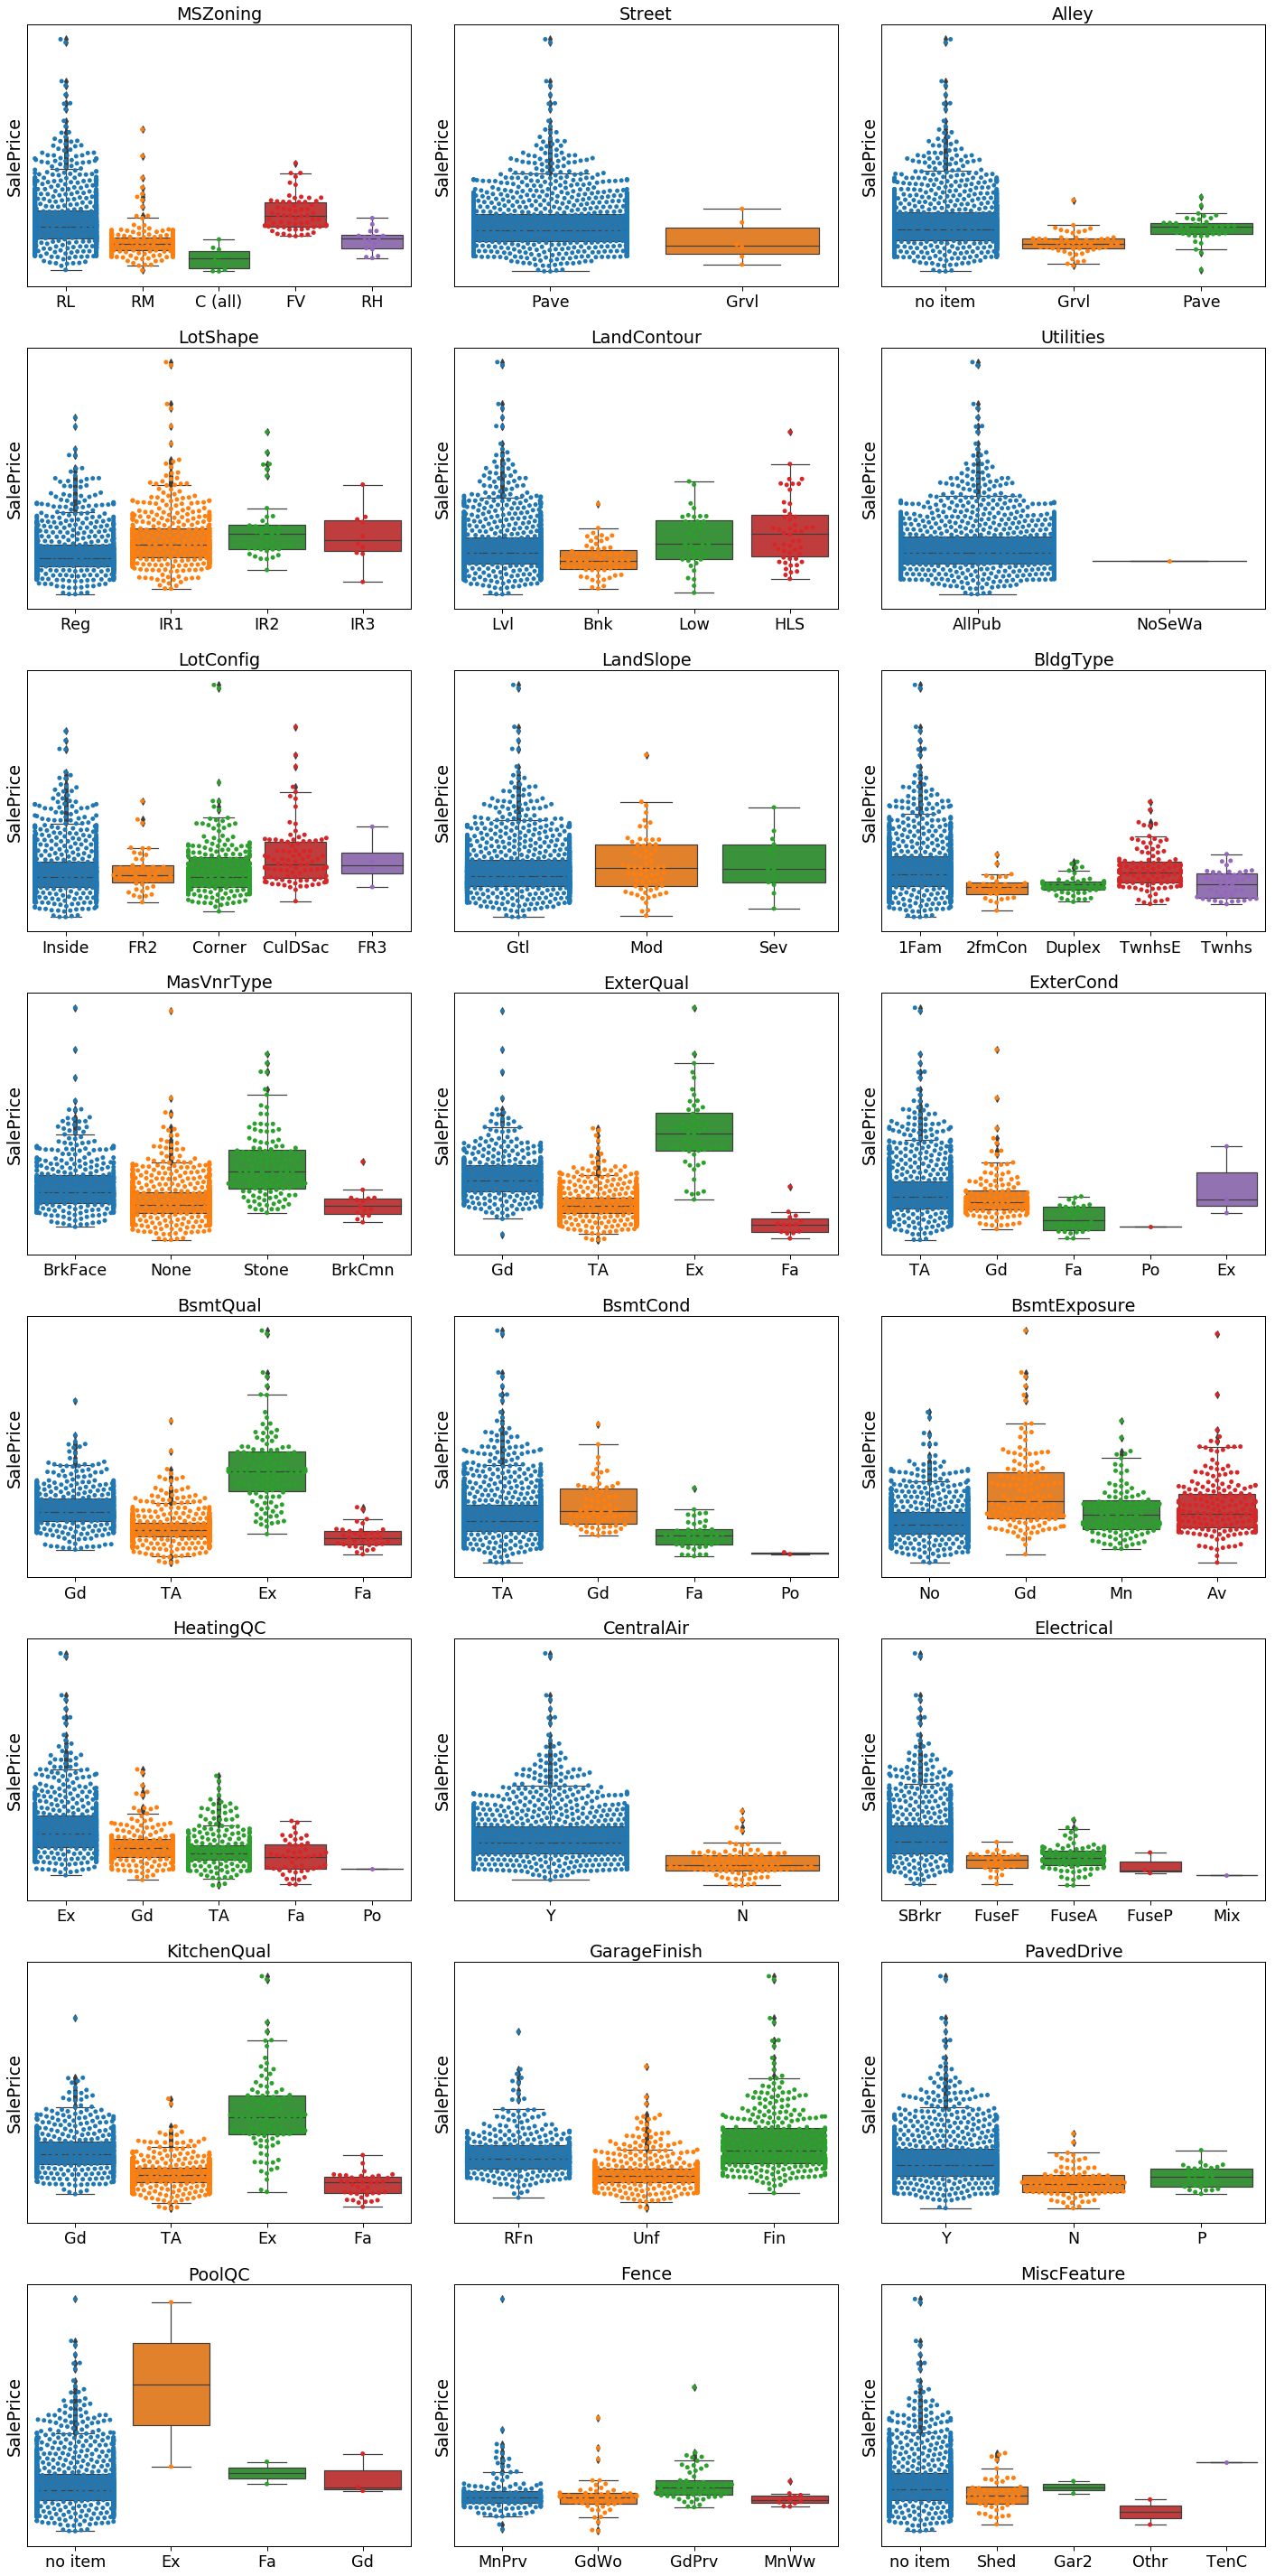

In [ ]:
fig, axes = plt.subplots(math.ceil(len(CATEGORIC_FITUR_SHORT)/3),3,figsize=(20,40))

ax = axes.ravel()

for i in range(len(CATEGORIC_FITUR_SHORT)):
    sns.boxplot(x=CATEGORIC_FITUR_SHORT[i],y='SalePrice',data=df_train,ax=ax[i])
    sns.swarmplot(x=CATEGORIC_FITUR_SHORT[i],y='SalePrice',data=df_train,ax=ax[i])
    ax[i].set_title(CATEGORIC_FITUR_SHORT[i])
    ax[i].set_yticks(())
    ax[i].set_xlabel('')
    #ax[i].set_xticklabels(df[CATEGORIC_FITUR[i]],rotation=45)
    
plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(math.ceil(len(CATEGORIC_FITUR_LONG)/3),3,figsize=(20,40))

ax = axes.ravel()

for i in range(len(CATEGORIC_FITUR_LONG)):
    sns.swarmplot(y=CATEGORIC_FITUR_LONG[i],x='SalePrice',data=df_train,ax=ax[i])
    sns.boxplot(y=CATEGORIC_FITUR_LONG[i],x='SalePrice',data=df_train,ax=ax[i])
    ax[i].set_title(CATEGORIC_FITUR_LONG[i])
    ax[i].set_ylabel('')
    
plt.tight_layout()
plt.show()

# 4. Relationship

In [ ]:
corrmat=df_train[NUMERIC_FITUR+['SalePrice']].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat,vmax=0.8,square=True)
plt.show()

In [ ]:
cols = ['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt','SalePrice']
sns.pairplot(df_train[cols],height=2.5)
plt.show()

In [ ]:
sns.boxplot(x='OverallQual',y='SalePrice',data=df_train)
plt.show()

In [ ]:
sns.boxplot(x='OverallCond',y='SalePrice',data=df_train)
plt.show()

In [ ]:
plt.figure(figsize=(20,10))

sns.set_context("paper", font_scale=2)

sns.boxplot(x='GarageCars',y='SalePrice',data=df_train)

plt.show()

In [ ]:
plt.figure(figsize=(20,10))

sns.set_context("paper", font_scale=2)

sns.boxplot(x='FullBath',y='SalePrice',data=df_train)

plt.show()

In [ ]:
plt.figure(figsize=(20,10))

sns.boxplot(x='YearBuilt',y='SalePrice',data=df_train)

plt.xticks(fontsize=12,rotation=90)
plt.show()